## Кластерный анализ городов ##

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 85


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
# загружаем датасет, регион переводим сразу в индекс

work_city_clust = pd.read_csv('C:/00_Projects/Lenin/Datasets/04_work_data/cities_100.csv', index_col='city')

In [4]:
work_city_clust.head()

,region,mun_district,city_type,population,street_number,lenin_street_number,monument_OKN_number,monument_lst_number,monument_weight,monument_OKN_weight
city,,,,,,,,,,
Москва,Москва,Москва,г,12678079,3521,3.0,9.0,112.0,0.0318,0.0026
Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,г,5398064,2170,5.0,6.0,61.0,0.0281,0.0028
Новосибирск,Новосибирская область,Новосибирск,г,1625631,2121,4.0,2.0,15.0,0.0071,0.0009
Екатеринбург,Свердловская область,Екатеринбург,г,1493749,1465,4.0,1.0,11.0,0.0075,0.0007
Казань,Татарстан,Казань,г,1257391,2302,3.0,2.0,18.0,0.0078,0.0009


In [5]:
work_city_clust.columns

Index(['region', 'mun_district', 'city_type', 'population', 'street_number',
       'lenin_street_number', 'monument_OKN_number', 'monument_lst_number',
       'monument_weight', 'monument_OKN_weight'],
      dtype='object')

In [6]:
# отбираем нужные столбцы для анализа

need_columns = ['lenin_street_number',
                'monument_OKN_number',
                'monument_lst_number']

In [7]:
# Исключаем Грозный, Назрань, Москву и Питер
#
work_city_clust = work_city_clust[~((work_city_clust.index == 'Грозный')
                                    | (work_city_clust.index == 'Назрань')
                                    | (work_city_clust.index == 'Москва')
                                    | (work_city_clust.index == 'Санкт-Петербург')
                                    #|(work_city_clust.index == 'Ногинск')
                                   )]

### Иерархический кластерный анализ ###

In [8]:
# Нормализуем данные

data_normed = preprocessing.MinMaxScaler().fit_transform(work_city_clust[need_columns].values)

In [9]:
data_normed[:3]

array([[0.57142857, 0.10526316, 0.55555556],
       [0.57142857, 0.05263158, 0.40740741],
       [0.42857143, 0.10526316, 0.66666667]])

In [10]:
# Вычисляем расстояния между данными (строками массива data_for_clust)
# по умолчанию евклидово расстояние

data_dist = pdist(data_normed, 'euclidean')

In [11]:
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров


link = linkage(data_dist, method='ward')

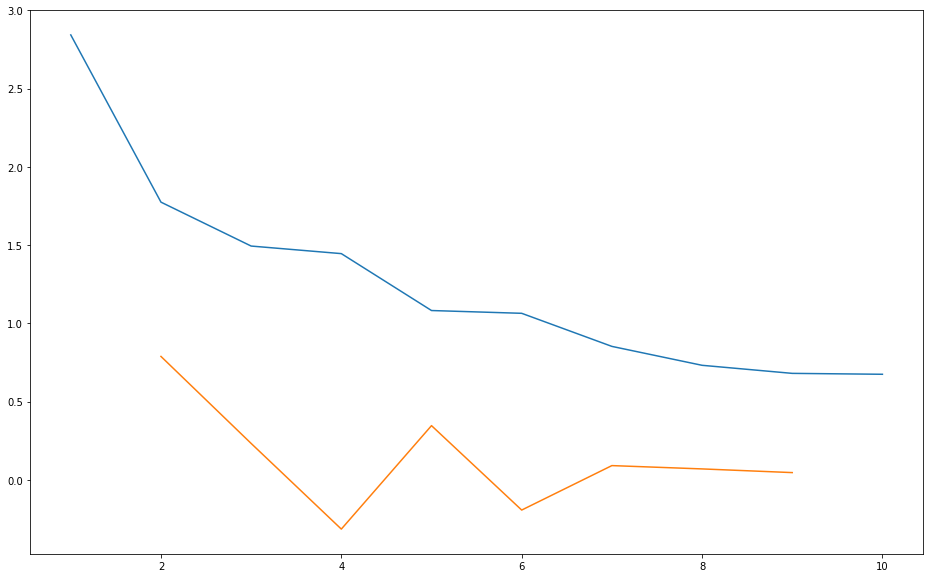

Рекомендованное количество кластеров: 2


In [12]:
plt.rcParams['figure.figsize']=(16, 10)

last = link[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

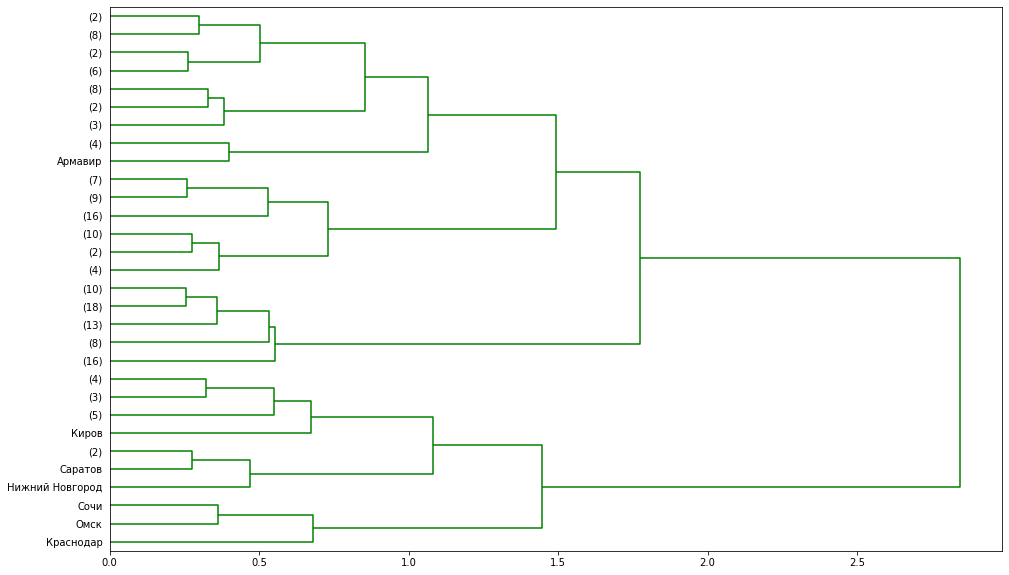

In [13]:
# строим дендрограмму 

dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels = work_city_clust.index.tolist(),
                
                # опция для более красивого отображения слишком ветввистой дендрограммы
                truncate_mode = 'lastp',
                
                # повернуть подписи вертикально
                color_threshold = 5,
                orientation = 'right',
                leaf_rotation=0.)

In [14]:
# Задаем количество кластеров

n_clusts = 5

In [15]:
# иерархическая кластеризация

clusters = fcluster(link, n_clusts, criterion='maxclust')

clusters

array([2, 2, 2, 2, 2, 5, 1, 5, 2, 5, 2, 5, 2, 1, 2, 3, 4, 5, 3, 5, 5, 5,
       5, 5, 5, 4, 4, 4, 3, 5, 4, 2, 5, 2, 2, 2, 3, 5, 5, 2, 4, 5, 1, 5,
       3, 4, 5, 5, 3, 3, 2, 4, 5, 2, 4, 3, 4, 4, 4, 5, 3, 2, 5, 4, 4, 5,
       5, 3, 4, 3, 3, 4, 5, 4, 4, 3, 4, 3, 3, 3, 3, 4, 5, 4, 4, 5, 3, 4,
       3, 4, 3, 4, 3, 3, 5, 5, 5, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 5, 3,
       4, 4, 4, 3, 4, 3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 5,
       4, 5, 3, 5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 5, 3, 4, 3, 3,
       3, 4, 3, 4, 3, 3, 4, 4, 4, 4, 3, 4, 3, 3, 3], dtype=int32)

In [16]:
# номера столбцов

for i in enumerate(need_columns):
    print(i[0], ': ', i[1], sep='')

0: lenin_street_number
1: monument_OKN_number
2: monument_lst_number


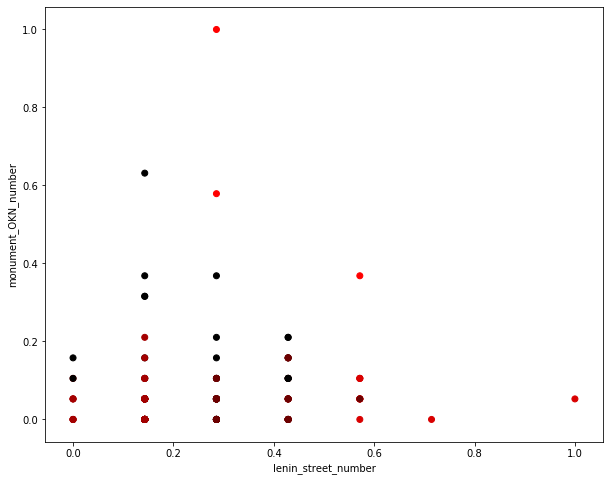

In [17]:
# Чтобы построить диаграмму в разных осях, меняйте номера столбцов

x = 0
y = 1

plt.figure(figsize=(10, 8))

plt.scatter(data_normed[:,x], data_normed[:,y], c=clusters, cmap='flag')
plt.xlabel(need_columns[x])
plt.ylabel(need_columns[y]);
plt.show()

In [18]:
# добавляем номер кластера

work_city_clust['cluster_hierarchy'] = clusters

In [19]:
# группируем

res_hierarchy = work_city_clust.groupby('cluster_hierarchy')[need_columns].mean()

res_hierarchy['Объектов в кластере'] = work_city_clust.groupby('cluster_hierarchy').size().values

In [20]:
# средние цифры по кластерам и количество объектов

res_hierarchy

,lenin_street_number,monument_OKN_number,monument_lst_number,Объектов в кластере
cluster_hierarchy,,,,
1,2.666667,12.333333,20.000000,3
2,3.588235,1.176471,14.117647,17
3,0.876923,0.584615,2.953846,65
4,2.354167,0.645833,3.875000,48
5,1.638889,2.361111,8.972222,36


In [34]:
# состав кластеров

work_city_clust[work_city_clust['cluster_hierarchy'] == 2][need_columns]

,lenin_street_number,monument_OKN_number,monument_lst_number
city,,,
Новосибирск,4.0,2.0,15.0
Екатеринбург,4.0,1.0,11.0
Казань,3.0,2.0,18.0
Нижний Новгород,3.0,3.0,27.0
Челябинск,3.0,1.0,14.0
Уфа,2.0,1.0,18.0
Воронеж,4.0,1.0,13.0
Волгоград,4.0,2.0,16.0
Саратов,1.0,0.0,22.0


### K-means ###

In [22]:
# строим кластеризаци методом KMeans

km = KMeans(n_clusters=n_clusts).fit(data_normed)

In [23]:
# выведем полученное распределение по кластерам
# так же номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1

km.labels_ +1

array([1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 5, 2, 4, 5, 2, 5, 5, 1,
       5, 5, 2, 4, 4, 4, 2, 5, 4, 1, 5, 1, 1, 1, 2, 5, 4, 5, 4, 5, 3, 5,
       2, 4, 5, 1, 2, 2, 1, 4, 5, 1, 4, 2, 4, 4, 4, 5, 2, 4, 5, 4, 4, 5,
       5, 2, 4, 2, 2, 4, 5, 5, 4, 2, 4, 2, 2, 2, 2, 4, 5, 4, 4, 5, 2, 4,
       2, 4, 2, 4, 2, 2, 5, 5, 3, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 5, 2,
       4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 5,
       4, 2, 2, 4, 5, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 5, 2, 4, 2, 2,
       2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2])

In [24]:
# номера столбцов

for i in enumerate(need_columns):
    print(i[0], ': ', i[1], sep='')

0: lenin_street_number
1: monument_OKN_number
2: monument_lst_number


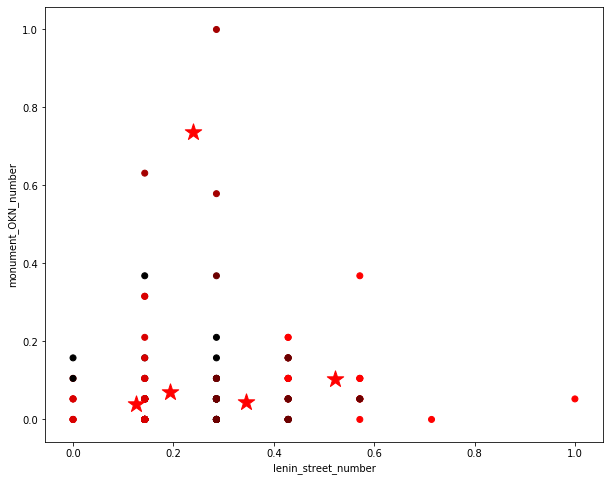

In [25]:
# Чтобы построить диаграмму в разных осях, меняйте номера столбцов
# звездочки центры кластеров

x = 0
y = 1

centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(data_normed[:,x], data_normed[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='r', label='centroid')
plt.xlabel(need_columns[x])
plt.ylabel(need_columns[y]);
plt.show()

In [26]:
# к оригинальным данным добавляем номера кластеров

work_city_clust['cluster_KMeans'] = km.labels_+1

In [27]:
# группируем

res_KMeans = work_city_clust.groupby('cluster_KMeans')[need_columns].mean()
res_KMeans['объектов в KM'] = work_city_clust.groupby('cluster_KMeans').size().values

In [28]:
# средние цифры по кластерам и количество объектов

res_KMeans

,lenin_street_number,monument_OKN_number,monument_lst_number,объектов в KM
cluster_KMeans,,,,
1,3.650000,1.950000,13.450000,20
2,0.880597,0.746269,2.985075,67
3,1.666667,14.000000,17.000000,3
4,2.411765,0.843137,4.019608,51
5,1.357143,1.321429,9.857143,28


In [29]:
# состав кластеров

work_city_clust[work_city_clust['cluster_KMeans'] == 5][need_columns]

,lenin_street_number,monument_OKN_number,monument_lst_number
city,,,
Саратов,1.0,0.0,22.0
Ижевск,1.0,1.0,8.0
Ульяновск,2.0,3.0,12.0
Иркутск,2.0,2.0,9.0
Ярославль,1.0,1.0,14.0
Владивосток,0.0,3.0,10.0
Рязань,2.0,1.0,10.0
Пенза,2.0,1.0,9.0
Калининград,1.0,1.0,13.0


In [30]:
# возвращаем города в столбец city

city_clust_res = (work_city_clust
                   .rename_axis('index').reset_index()
                   .rename(columns={'index': 'city'})
                  )

In [31]:
city_clust_res.to_excel('C:/00_Projects/Lenin/Datasets/04_work_data/city_hierarchy.xlsx', encoding='utf-8', index=False)

In [32]:
res_hierarchy.to_excel('C:/00_Projects/Lenin/Datasets/04_work_data/city_res_hierarchy.xlsx', encoding='utf-8', index=False)